In [1]:
# %pip install pandas-profiling

In [2]:
# %pip install statsmodels scipy scikit-learn matplotlib seaborn

In [3]:
# %pip install pandas numpy psycopg2 SQLAlchemy requests beautifulsoup4 networkx wordcloud gensim nltk

## Import Python Libraries 

In [4]:
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## # Load the dataset

In [5]:
file_path = 'E:/Airpen/postings.csv/postings.csv'

In [6]:
df = pd.read_csv(file_path)

In [7]:
df.head()

,job_title,company,job_location,job_link,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills
0,Data Engineer 2,Cook Medical,"Bloomington, IN",https://www.linkedin.com/jobs/view/data-engine...,2023-12-17,Bloomington,United States,Mid senior,Onsite,"Overview\nThe Data Engineer develops, implemen...","Azure, SQL, NoSQL, SQL Server, Oracle, MongoDB..."
1,Staff Data Engineer,Recruiting from Scratch,"Bloomington, IN",https://www.linkedin.com/jobs/view/staff-data-...,2023-12-17,Bloomington,United States,Mid senior,Onsite,This is for a client of Recruiting from Scratc...,"Python, Snowflake, Airflow, Kubernetes, Docker..."
2,"Senior Data Engineer, Public Company",Recruiting from Scratch,"Bloomington, IN",https://www.linkedin.com/jobs/view/senior-data...,2023-12-17,Bloomington,United States,Mid senior,Onsite,This is for a client of Recruiting from Scratc...,"Python, SQL, Snowflake, Airflow, Kubernetes, D..."
3,"Senior Data Engineer, Public Company",Recruiting from Scratch,"Bloomington, IN",https://www.linkedin.com/jobs/view/senior-data...,2023-12-17,Bloomington,United States,Mid senior,Onsite,This is for a client of Recruiting from Scratc...,"TDD, Automation, Continuous delivery, Data eng..."
4,"Senior Systems Engineer, Azure Data Platform",Cook Medical,"Bloomington, IN",https://www.linkedin.com/jobs/view/senior-syst...,2023-12-17,Bloomington,United States,Mid senior,Hybrid,Overview\nWe are seeking a talented Azure Clou...,NaN


In [8]:
print(df.columns)

Index(['job_title', 'company', 'job_location', 'job_link', 'first_seen',
       'search_city', 'search_country', 'job level', 'job_type', 'job_summary',
       'job_skills'],
      dtype='object')


## data cleaning

In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
# Handle missing values
df.dropna(inplace=True)

In [11]:
# Standardize text
df['job_summary'] = df['job_summary'].apply(lambda x: x.lower())  # Convert text to lowercase
df['job_summary'] = df['job_summary'].str.replace('[^\w\s]', '')  # Remove punctuation

In [12]:
# Remove irrelevant data (if any)
# For example, if there's a column named 'location' that's not relevant
df.drop(columns=['search_city'], inplace=True)

## Analyze the most in-demand skills and software for data engineering positions

In [13]:
# Tokenize job descriptions and remove stop words
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sushreeta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sushreeta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stop_words = set(stopwords.words('english'))
all_skills = []
for desc in df['job_summary']:
    tokens = word_tokenize(desc.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    all_skills.extend(tokens)

In [15]:
# Count the frequency of each skill
skill_counts = Counter(all_skills)
# Top N most common skills
top_skills = skill_counts.most_common(10)

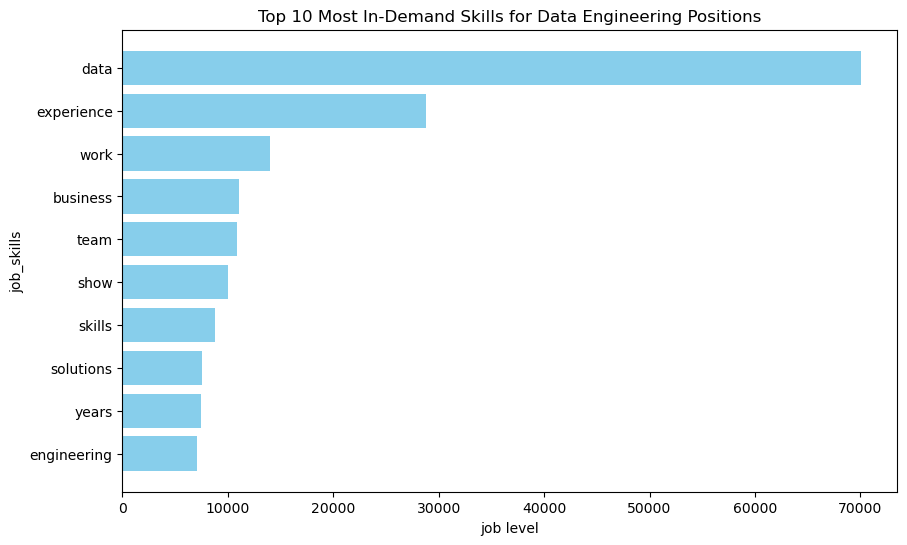

In [16]:
# Plot the most in-demand skills
skills, counts = zip(*top_skills)
plt.figure(figsize=(10, 6))
plt.barh(skills, counts, color='skyblue')
plt.xlabel('job level')
plt.ylabel('job_skills')
plt.title('Top 10 Most In-Demand Skills for Data Engineering Positions')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent at the top
plt.show()

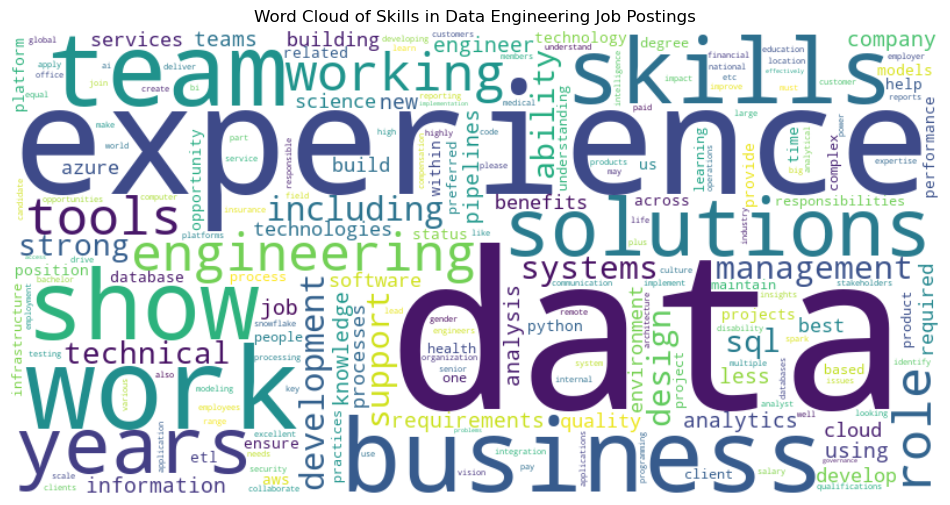

In [17]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(skill_counts)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Skills in Data Engineering Job Postings')
plt.show()

## Find common job titles and identify emerging job roles in the data engineering field.

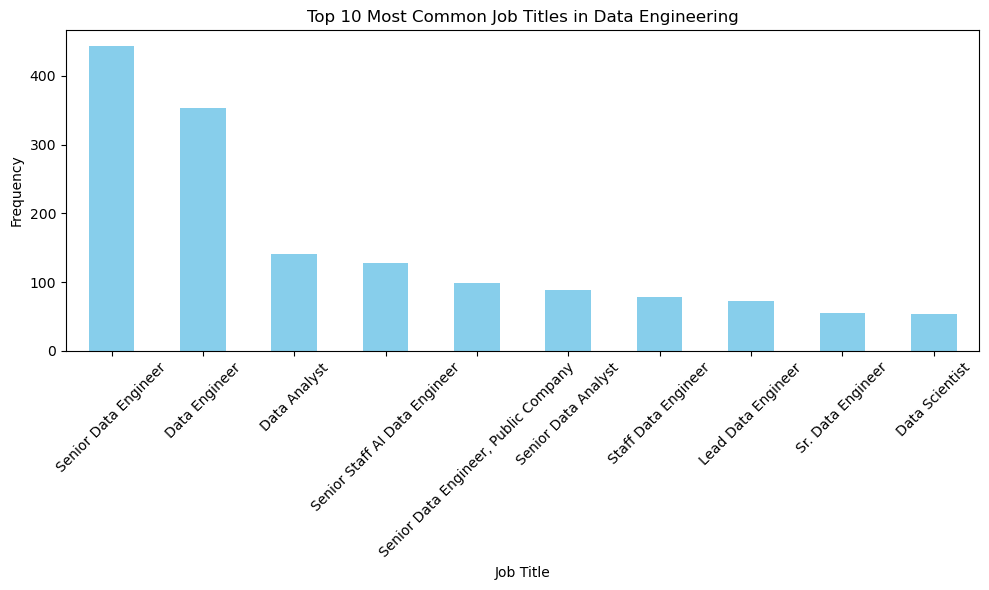

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract job titles from the 'job_title' column
job_titles = df['job_title']

# Count the frequency of each job title
job_title_counts = job_titles.value_counts()

# Visualize the top N most common job titles
top_n = 10  # Adjust as needed
top_job_titles = job_title_counts.head(top_n)

# Plot the most common job titles
plt.figure(figsize=(10, 6))
top_job_titles.plot(kind='bar', color='skyblue')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Common Job Titles in Data Engineering')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
unique_job_titles = df['job_title'].unique()
print(unique_job_titles)

['Data Engineer 2' 'Staff Data Engineer'
 'Senior Data Engineer, Public Company' ... 'HR Systems and Data Analyst'
 'Senior Oracle Data Analyst' 'Energy Data and Forecast Analyst']


In [21]:
for job_title in unique_job_titles:
    print(job_title)

Data Engineer 2
Staff Data Engineer
Senior Data Engineer, Public Company
Senior Staff AI Data Engineer
Data Scientist - National Defense/Python/SQL/AWS/MLOps/Clearances
Senior ETL Data Quality Engineer
Senior Engineer, Data
Senior Data Engineer
Sr. Data Software Engineer
Data Analyst || Remote
Job Opportunity :: Sr. Data Engineer :: 12 Months Contract to hire :: Fully Remote (Hybrid to Houston, TX)
Data Integration Developer
Lead Azure Data Engineer
Data Engineer - Lead
Urgent Role - Senior Data Engineer || Remote
Founding Data Engineer
Healthcare Data Analyst
Data Engineer( Informatica power Center and Data Stage EXP)
Job Opening for Senior Data Solutions Engineer - backfill - Remote
Lead Data Engineer (AWS, Azure, GCP)
Remote Work - Need Sr Data Software Engineer
Software Engineer, Data Warehouse Analytics
(Level III Database Engineer- ETL- SSIS, ADF, C#)
Sr. Data Engineer - Remote
Senior Data Engineer / Remote
REMOTE: Data Engineer //Pay rate: $43.35/hr
Senior Data Warehouse Enginee

In [22]:
# Convert 'first_seen' column to datetime format
df['first_seen'] = pd.to_datetime(df['first_seen'])

# Define the earlier and recent time periods
earlier_period = ('2023-01-01', '2023-06-30')  # Example earlier period (adjust as needed)
recent_period = ('2023-07-01', '2023-12-31')   # Example recent period (adjust as needed)

# Filter data for the earlier and recent periods
earlier_data = df[df['first_seen'].between(*earlier_period)]
recent_data = df[df['first_seen'].between(*recent_period)]

# Count frequencies of job titles for the earlier and recent periods
earlier_job_title_counts = earlier_data['job_title'].value_counts()
recent_job_title_counts = recent_data['job_title'].value_counts()

# Identify emerging job roles
emerging_job_roles = []
for job_title, recent_count in recent_job_title_counts.items():
    earlier_count = earlier_job_title_counts.get(job_title, 0)
    if recent_count > earlier_count:
        emerging_job_roles.append(job_title)

print("Emerging Job Roles:")
for job_role in emerging_job_roles:
    print(job_role)

Emerging Job Roles:
Senior Data Engineer
Data Engineer
Data Analyst
Senior Staff AI Data Engineer
Senior Data Engineer, Public Company
Senior Data Analyst
Staff Data Engineer
Lead Data Engineer
Sr. Data Engineer
Data Scientist
Senior Cloud Data Engineer
Data Engineer - Scala(U.S. remote)
Senior Data Engineer, Gigster Network - Chicago
Principal Data Engineer
Sr. Data Analyst
Data Center Engineer
Business Data Analyst
Sr Data Engineer
Junior Data Engineer
Lead Data Analyst
Data Scientist, gt.school (Remote) - $60,000/year USD
Database Engineer
Azure Data Engineer
Customer Service Representative/Data Analyst/Data Entry Clerk Part Time
Data Research Analyst, gt.school (Remote) - $60,000/year USD
Customer Service Representative/Data Analyst/Data Entry Clerk Full Time
Customer Service Representative/Data Analyst/Data Entry Clerk
Contract: Database Automation Engineer / DBA-DevOps
Data Analyst Part Time
AWS Data Engineer
Senior Database Engineer
Senior Data Engineer - up to GBP75k
Data Conve

No common job titles found between the earlier and recent periods.


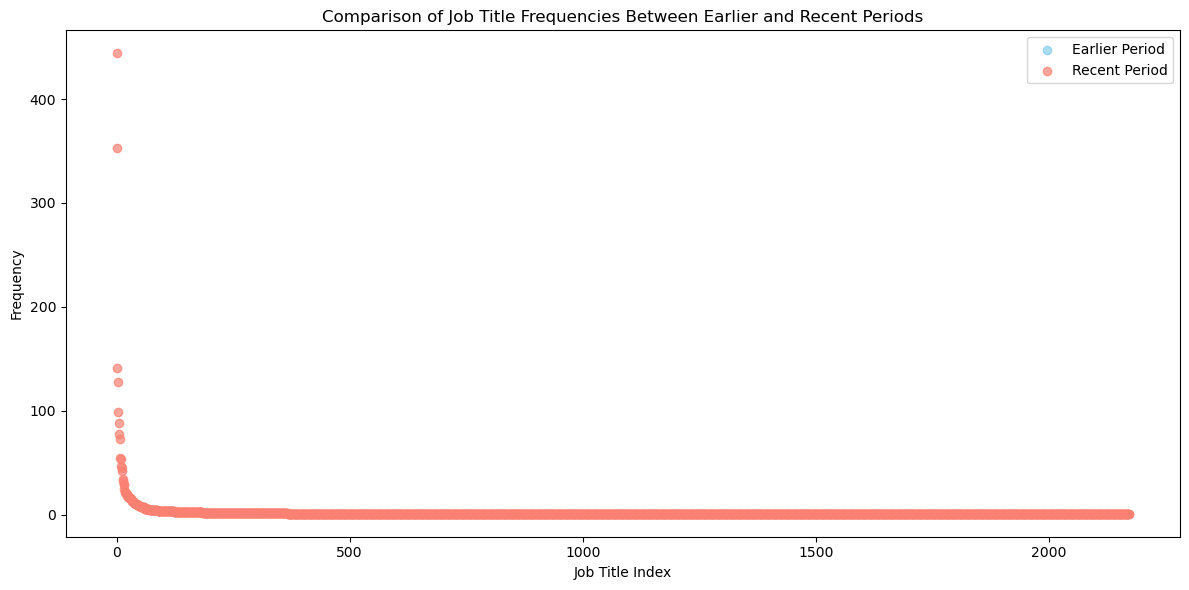

In [23]:
# Convert 'first_seen' column to datetime format
df['first_seen'] = pd.to_datetime(df['first_seen'])

# Define the earlier and recent time periods
earlier_period = ('2023-01-01', '2023-06-30')  # Example earlier period (adjust as needed)
recent_period = ('2023-07-01', '2023-12-31')   # Example recent period (adjust as needed)

# Filter data for the earlier and recent periods
earlier_data = df[df['first_seen'].between(*earlier_period)]
recent_data = df[df['first_seen'].between(*recent_period)]

# Count frequencies of job titles for the earlier and recent periods
earlier_job_title_counts = earlier_data['job_title'].value_counts()
recent_job_title_counts = recent_data['job_title'].value_counts()

# Identify common job titles between the earlier and recent periods
common_job_titles = set(earlier_job_title_counts.index) & set(recent_job_title_counts.index)

if len(common_job_titles) > 0:
    # Identify emerging job roles
    emerging_job_roles = [job_title for job_title in common_job_titles if recent_job_title_counts[job_title] > earlier_job_title_counts.get(job_title, 0)]

    # Filter data for emerging job roles
    earlier_job_title_counts = earlier_job_title_counts.loc[emerging_job_roles]
    recent_job_title_counts = recent_job_title_counts.loc[emerging_job_roles]

    # Create a bar plot to compare frequencies
    plt.figure(figsize=(12, 6))
    earlier_job_title_counts.plot(kind='bar', color='skyblue', label='Earlier Period')
    recent_job_title_counts.plot(kind='bar', color='salmon', alpha=0.7, label='Recent Period')
    plt.xlabel('Job Title')
    plt.ylabel('Frequency')
    plt.title('Comparison of Emerging Job Titles Between Earlier and Recent Periods')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No common job titles found between the earlier and recent periods.")
# Create scatter plots for job titles in the earlier and recent periods
plt.figure(figsize=(12, 6))

# Scatter plot for earlier period
plt.scatter(range(len(earlier_job_title_counts)), earlier_job_title_counts.values,
            color='skyblue', label='Earlier Period', alpha=0.7)

# Scatter plot for recent period
plt.scatter(range(len(recent_job_title_counts)), recent_job_title_counts.values,
            color='salmon', label='Recent Period', alpha=0.7)

plt.xlabel('Job Title Index')
plt.ylabel('Frequency')
plt.title('Comparison of Job Title Frequencies Between Earlier and Recent Periods')
plt.legend()
plt.tight_layout()
plt.show()


## Explore the geographical distribution of data engineering job opportunities.

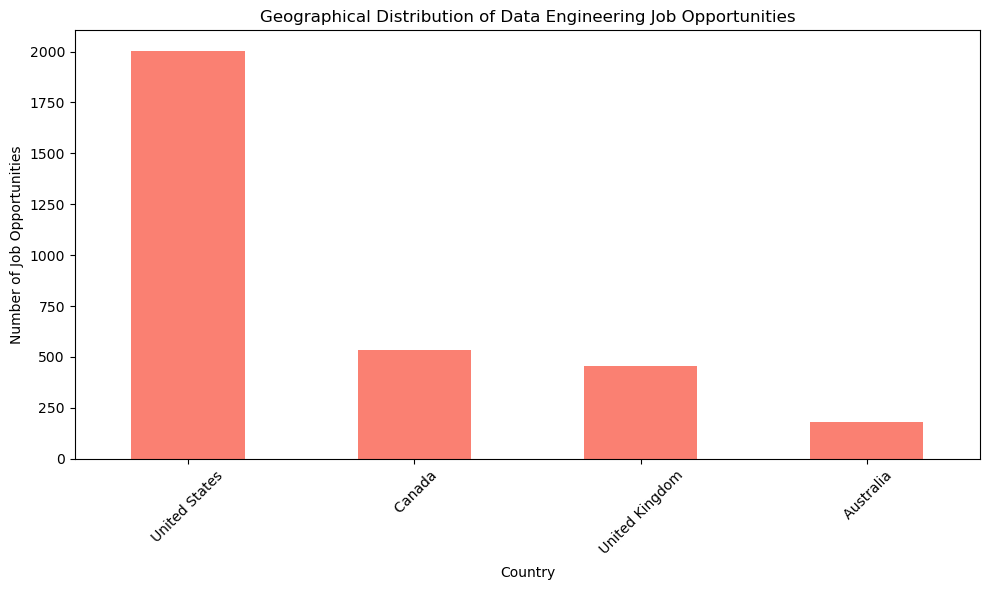

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'E:/Airpen/postings.csv/postings.csv'
df = pd.read_csv(file_path)

# Filter data engineering job opportunities
data_engineering_jobs = df[df['job_title'].str.contains('Data Engineer', case=False)]

# Group by country and count the number of job opportunities
job_opportunities_by_country = data_engineering_jobs['search_country'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
job_opportunities_by_country.plot(kind='bar',color='salmon')
plt.title('Geographical Distribution of Data Engineering Job Opportunities')
plt.xlabel('Country')
plt.ylabel('Number of Job Opportunities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Determine the average job level and types of data engineering positions available.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'E:/Airpen/postings.csv/postings.csv'
df = pd.read_csv(file_path)

# Filter data engineering positions
data_engineering_df = df[df['job_title'].str.contains('data engineer', case=False)].copy()

# Convert "job level" column to numeric (if possible)
data_engineering_df.loc[:, 'job level'] = pd.to_numeric(data_engineering_df['job level'], errors='coerce')

# Remove rows with NaN values in "job level" column
data_engineering_df.dropna(subset=['job level'], inplace=True)

# Check if there are any rows in the DataFrame after dropping NaN values
if data_engineering_df.empty:
    print("No valid job levels found for data engineering positions.")
else:
    # Calculate average job level
    average_job_level = data_engineering_df['job level'].mean()

    # Count occurrences of each job type
    job_type_counts = data_engineering_df['job_type'].value_counts()

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot job type counts
    plt.subplot(1, 2, 1)
    job_type_counts.plot(kind='bar', color='skyblue')
    plt.title('Job Type Distribution')
    plt.xlabel('Job Type')
    plt.ylabel('Count')

    # Plot average job level
    plt.subplot(1, 2, 2)
    plt.bar(['Average Job Level'], [average_job_level], color='lightgreen')
    plt.title('Average Job Level')
    plt.ylabel('Job Level')

    plt.tight_layout()
    plt.show()


No valid job levels found for data engineering positions.


## Identify the most sought-after skills for entry-level, mid-level, and senior-level data engineering roles.

In [26]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
data = pd.read_csv('E:/Airpen/postings.csv/postings.csv')

In [27]:
# Define job levels
job_levels = ['entry', 'mid', 'senior']

# Initialize dictionaries to store skills for each job level
skills_entry = Counter()
skills_mid = Counter()
skills_senior = Counter()

# Iterate through each row in the DataFrame
for index, row in data.iterrows():
    # Extract job level and skills for the current row
    job_level = row['job level'].lower()
    job_skills = row['job_skills']
    
    # Check if job_skills is NaN
    if isinstance(job_skills, str):
        job_skills = job_skills.split(',')  # Assuming skills are separated by commas
    
        # Update skill counters based on job level
        if job_level in job_levels:
            if job_level == 'entry':
                skills_entry.update(job_skills)
            elif job_level == 'mid':
                skills_mid.update(job_skills)
            elif job_level == 'senior':
                skills_senior.update(job_skills)

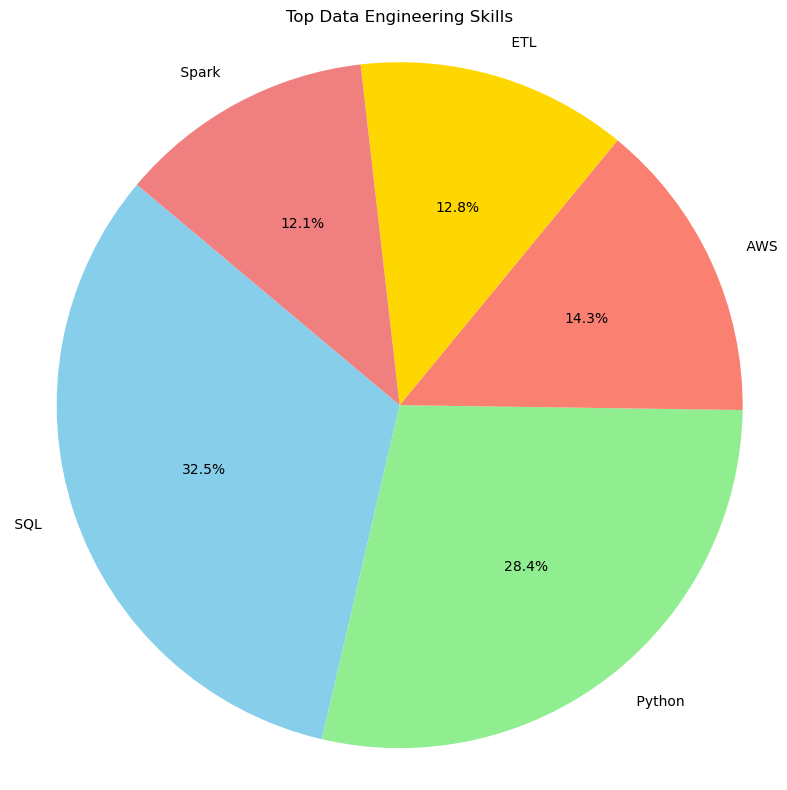

In [28]:
# Define job levels
job_levels = ['entry', 'mid', 'senior']

# Initialize a dictionary to store skills for all job levels
all_skills = {}

# Iterate through each row in the DataFrame
for index, row in data.iterrows():
    # Extract job level and skills for the current row
    job_level = row['job level'].lower()
    job_skills = row['job_skills']
    
    # Check if job_skills is a string
    if isinstance(job_skills, str):
        job_skills = job_skills.split(',')  # Assuming skills are separated by commas
        
        # Update skill dictionary for all job levels
        for skill in job_skills:
            all_skills[skill] = all_skills.get(skill, 0) + 1

# Sort the skills dictionary by value (count of occurrences) and get top 5 skills
top_skills = dict(sorted(all_skills.items(), key=lambda item: item[1], reverse=True)[:5])

# Define custom colors for the pie chart
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral']

# Create a pie chart with percentage labels
plt.figure(figsize=(8, 8))
plt.pie(top_skills.values(), labels=top_skills.keys(), autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top Data Engineering Skills')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()


## Text summerzation , duplicate value ,how many job in all level

In [30]:
import pandas as pd

# Load your dataset into a pandas DataFrame
data = pd.read_csv('E:/Airpen/postings.csv/postings.csv')

# Text Summarization
# Assuming 'job_summary' column contains text data to summarize
# Here, we'll just create a new column 'summary' containing the first 50 characters of each job summary
data['summary'] = data['job_summary'].str[:50] + '...'  

# Remove duplicate values
data.drop_duplicates(inplace=True)

# Count the number of jobs at each level
job_counts = data['job level'].value_counts()

# Display the summary, count of duplicates removed, and job counts at each level
print("Text Summaries:")
print(data['summary'].head())  # Display first few summaries
print("\nNumber of Duplicate Values Removed:", len(data) - len(data.drop_duplicates()))
print("\nNumber of Jobs at Each Level:")
print(job_counts)

Text Summaries:
0    Overview\nThe Data Engineer develops, implemen...
1    This is for a client of Recruiting from Scratc...
2    This is for a client of Recruiting from Scratc...
3    This is for a client of Recruiting from Scratc...
4    Overview\nWe are seeking a talented Azure Clou...
Name: summary, dtype: object

Number of Duplicate Values Removed: 0

Number of Jobs at Each Level:
job level
Mid senior    5076
Associate      949
Name: count, dtype: int64


In [31]:
# Filter the DataFrame to include only the specified job levels
filtered_data = data[data['job level'].isin(['senior', 'mid', 'junior', 'associate'])]

# Count the number of jobs at each level
job_counts = filtered_data['job level'].value_counts()

# Display the number of jobs at each level
print(job_counts)

Series([], Name: count, dtype: int64)


In [32]:
# Count the occurrences of each unique value in the 'job_level' column
job_level_counts = data['job level'].value_counts()

# Display the unique values and their counts
print(job_level_counts)

job level
Mid senior    5076
Associate      949
Name: count, dtype: int64


In [33]:
# Describe the job summary column
summary_stats = data['job_summary'].describe()

# Display the summary statistics
print(summary_stats)

count                                                  5665
unique                                                 4492
top       Who is Recruiting from Scratch :\nRecruiting f...
freq                                                     81
Name: job_summary, dtype: object


## You could build a visualization, do a text analysis, or summarize the data in python.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

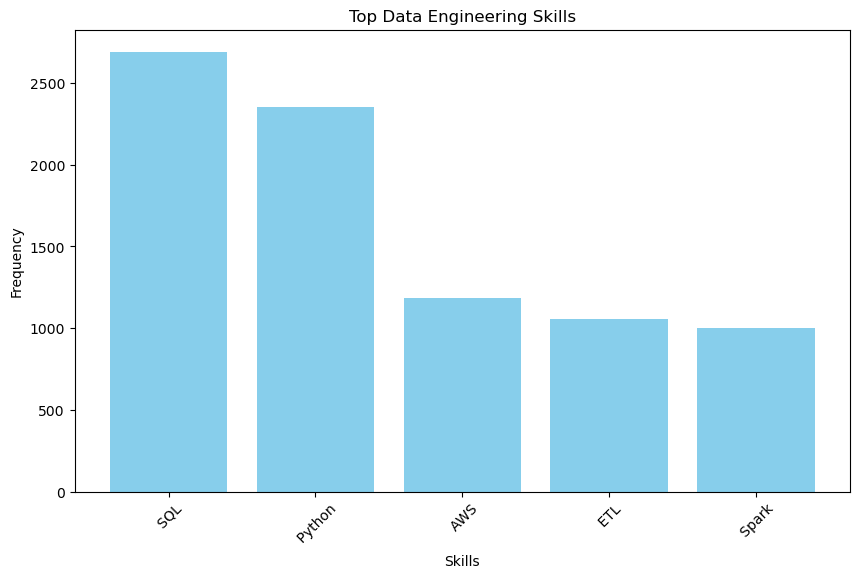

In [35]:
# Assuming you have already processed your data and stored it in the 'top_skills' dictionary
plt.figure(figsize=(10, 6))
plt.bar(top_skills.keys(), top_skills.values(), color='skyblue')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.title('Top Data Engineering Skills')
plt.xticks(rotation=45)
plt.show()

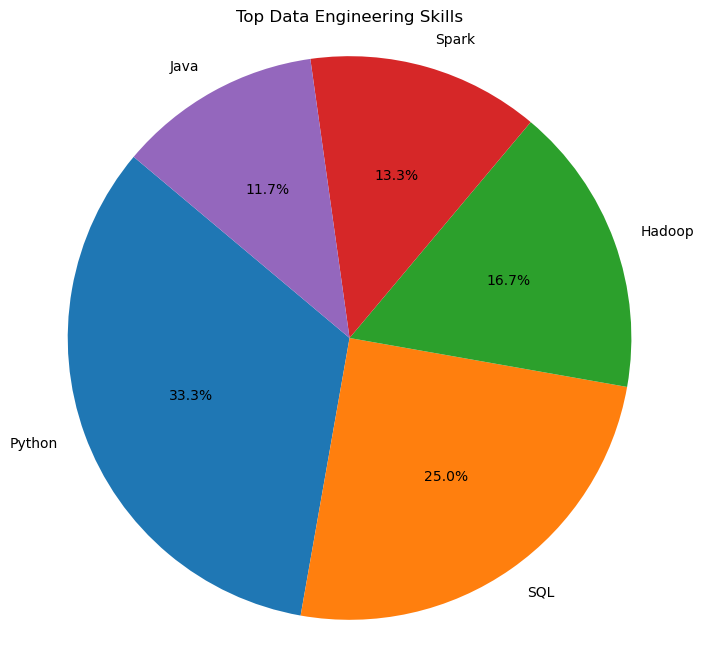

In [36]:
# 1. Pie Chart
top_skills = {'Python': 20, 'SQL': 15, 'Hadoop': 10, 'Spark': 8, 'Java': 7}
plt.figure(figsize=(8, 8))
plt.pie(top_skills.values(), labels=top_skills.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Top Data Engineering Skills')
plt.axis('equal')
plt.show()


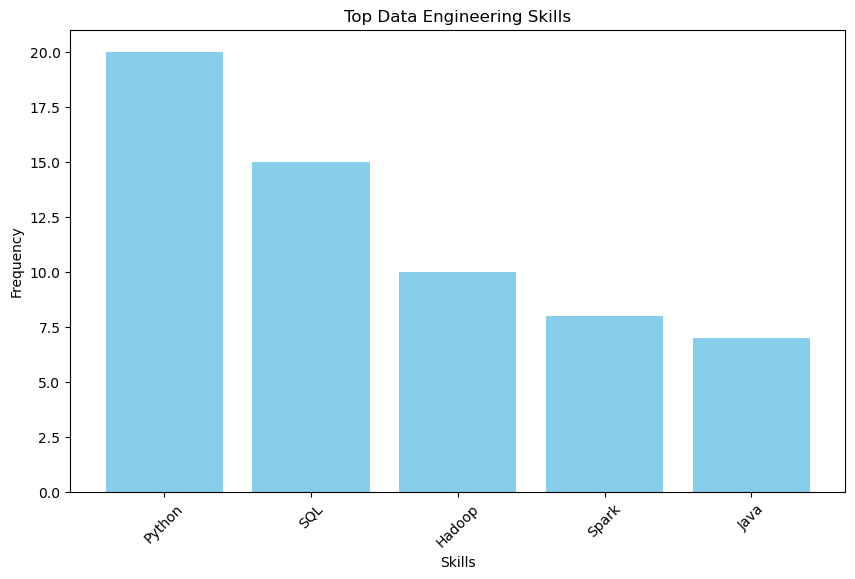

In [37]:
# 2. Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(top_skills.keys(), top_skills.values(), color='skyblue')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.title('Top Data Engineering Skills')
plt.xticks(rotation=45)
plt.show()


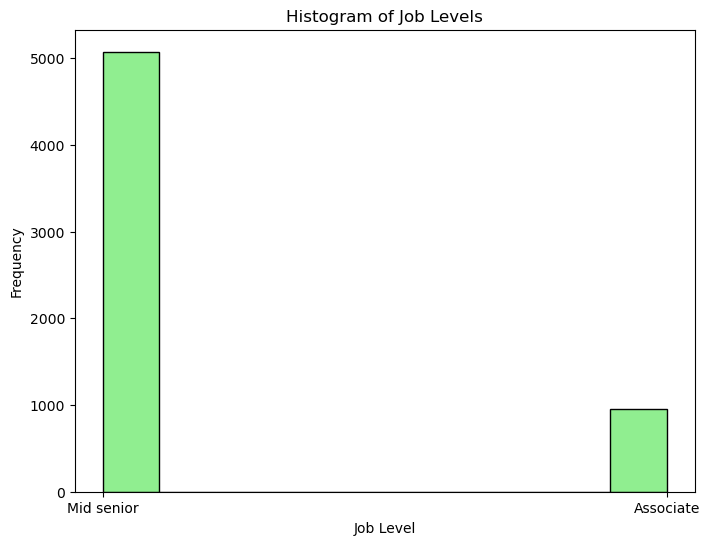

In [38]:
# 3. Histogram
plt.figure(figsize=(8, 6))
plt.hist(data['job level'], color='lightgreen', edgecolor='black')
plt.xlabel('Job Level')
plt.ylabel('Frequency')
plt.title('Histogram of Job Levels')
plt.show()

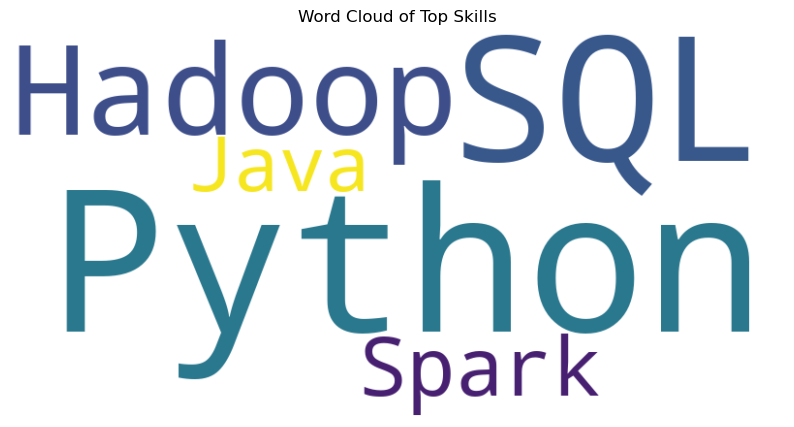

In [39]:
# 7. Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_skills)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Skills')
plt.show()

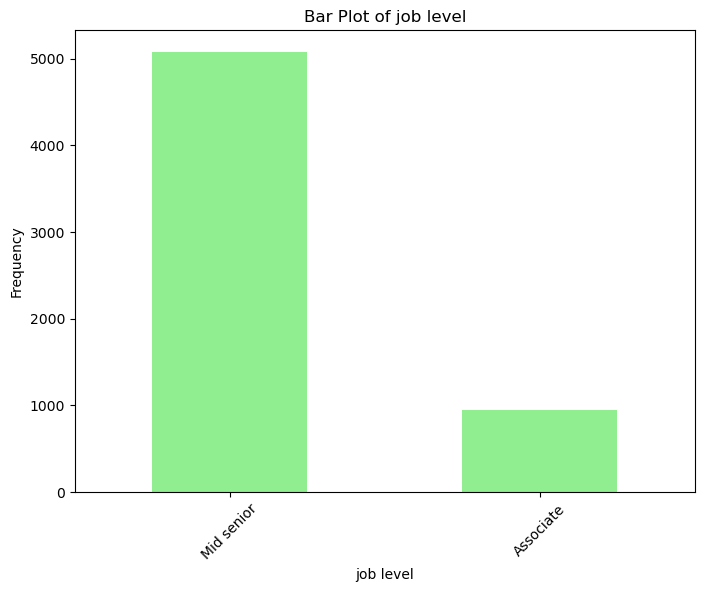

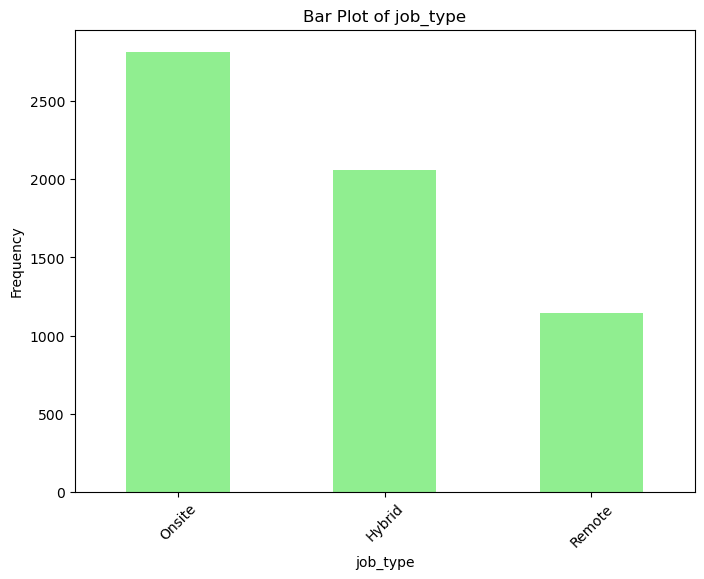

In [40]:
# Visualize categorical columns
categorical_columns = ['job level', 'job_type']  # Replace with actual categorical columns

# Create bar plots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    data[column].value_counts().plot(kind='bar', color='lightgreen')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Bar Plot of {column}')
    plt.xticks(rotation=45)
    plt.show()

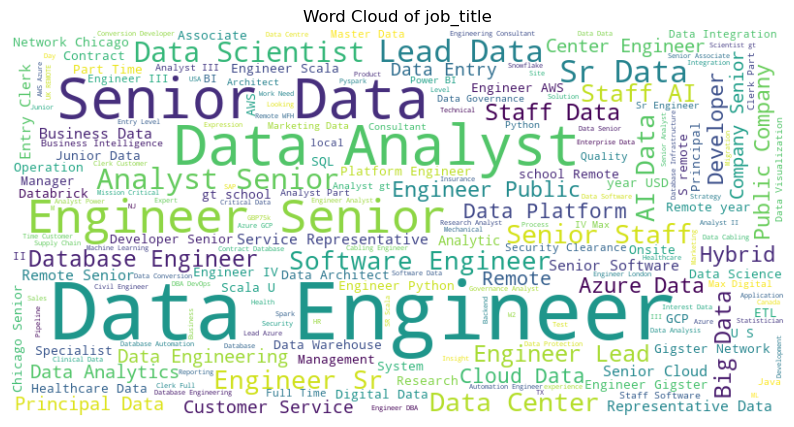

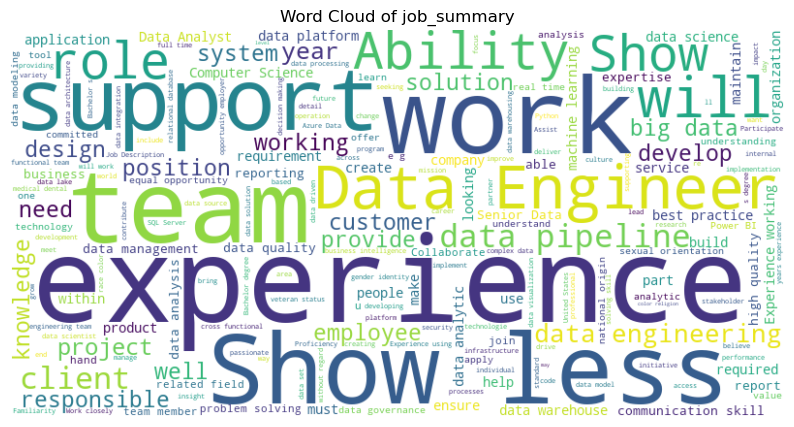

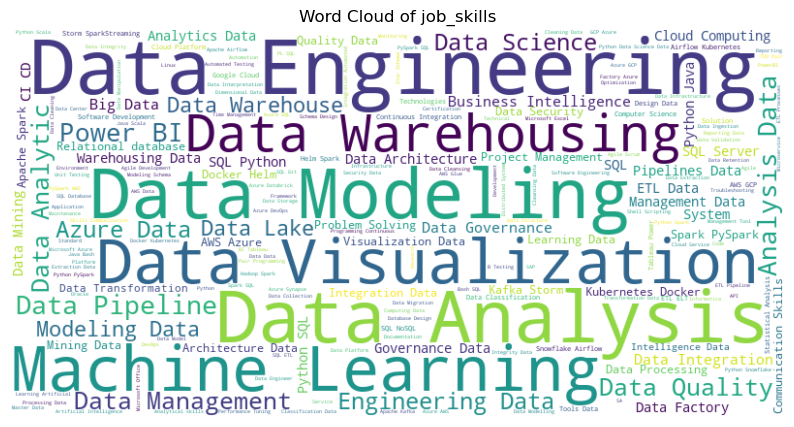

In [41]:
# Visualize text data
text_columns = ['job_title', 'job_summary', 'job_skills']  # Replace with actual text columns

# Create word clouds for text columns
for column in text_columns:
    # Concatenate text from all rows
    text = ' '.join(data[column].dropna())
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud of {column}')
    plt.axis('off')
    plt.show()